In [1]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 

In [2]:
warnings.filterwarnings('ignore')

## Load Tweets

In [3]:
df_train = pd.read_csv('./datasets/train.csv')
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


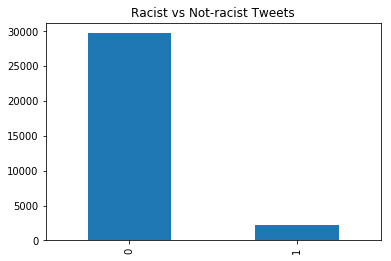

In [4]:
df_train['label'].value_counts().plot(kind='bar')
plt.title('Racist vs Not-racist Tweets')
plt.savefig('./images/plot-racist-vs-not-racist-tweets')
plt.show()

## Set Helpers

In [5]:
def remove_pattern(text, pattern):
    
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
        
    return text

## Preprocess Tweets

#### 1) Removing twitter handles (@user)

In [6]:
pattern = '@[\w]*'

In [7]:
df_train['cleaned_tweet'] = np.vectorize(remove_pattern)(df_train['tweet'], pattern)
df_train.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


#### 2) Removing punctuations, numbers and special characters

In [8]:
df_train['cleaned_tweet'] = df_train['cleaned_tweet'].str.replace('[^a-zA-Z#]', ' ')
df_train.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


#### 3) Removing very short words

In [9]:
min_length = 3

In [10]:
df_train['cleaned_tweet'] = df_train['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>min_length]))
df_train.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


#### 4) Tokenizing cleaned tweets

In [11]:
df_train['tokenized_tweet'] = df_train['cleaned_tweet'].apply(lambda x: x.split())
df_train.head()

,id,label,tweet,cleaned_tweet,tokenized_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,"[when, father, dysfunctional, selfish, drags, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,"[thanks, #lyft, credit, cause, they, offer, wh..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,#model love take with time,"[#model, love, take, with, time]"
4,5,0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #motivation]"


#### 4) Stemming tokenized tweets

In [12]:
from nltk.stem.porter import *

In [13]:
stemmer = PorterStemmer()

In [ ]:
df_train['tokenized_stemmed_tweet'] = df_train['tokenized_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
df_train.head()

,id,label,tweet,cleaned_tweet,tokenized_tweet,tokenized_stemmed_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,"[when, father, dysfunctional, selfish, drags, ...","[when, father, dysfunct, selfish, drag, kid, i..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,"[thanks, #lyft, credit, cause, they, offer, wh...","[thank, #lyft, credit, caus, they, offer, whee..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,#model love take with time,"[#model, love, take, with, time]","[#model, love, take, with, time]"
4,5,0,factsguide: society now #motivation,factsguide society #motivation,"[factsguide, society, #motivation]","[factsguid, societi, #motiv]"


#### 5) Putting the preprocessed result into cleaned tweets

In [ ]:
for i in range(len(df_train['tokenized_stemmed_tweet'])):
    df_train['cleaned_tweet'][i] = ' '.join(df_train['tokenized_stemmed_tweet'][i])

In [ ]:
df_train.head()

---